# SALARY ANALYSIS

In [41]:
import pandas as pd
import math
import numpy as np
import random as rd
import datetime as dt
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
salary = pd.read_csv('Salaries-checkpoint.csv', low_memory=False)

## Data exploration 

### In this process, the data is studied, analyzed and understood by visualizing representations of data.

In [3]:
salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
salary.shape

(148648, 13)

In [5]:
salary.isna().any()

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay         False
OtherPay            False
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

In [6]:
# Dealing with missing values after check dataset
print('NaN occurrences in Columns:')
print(salary.isnull().sum(axis = 0))

NaN occurrences in Columns:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36158
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148648
Agency                   0
Status              110529
dtype: int64


In [7]:
print('NaN occurrences in DataFrame:')
print(salary.isnull().sum().sum())

NaN occurrences in DataFrame:
295940


In [8]:
salary.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148648.000000,148043.000000,148648.000000,148648.000000,112490.000000,148648.000000,148648.000000,148648.000000,0.0
mean,74326.110220,66325.398119,5065.821161,3648.761721,25007.777439,74770.035453,93694.776345,2012.522617,NaN
std,42911.633315,42764.898947,11454.266982,8056.655841,15402.235424,50516.440633,62792.743250,1.117526,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37163.750000,33587.350000,0.000000,0.000000,11535.192500,36169.370000,44072.062500,2012.000000,NaN
50%,74326.500000,65007.450000,0.000000,811.205000,28628.365000,71427.130000,92406.020000,2013.000000,NaN
75%,111488.250000,94691.050000,4657.597500,4236.035000,35566.790000,105840.920000,132876.997500,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [9]:
salary.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [10]:
salary.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [11]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148648 entries, 0 to 148647
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148648 non-null  int64  
 1   EmployeeName      148648 non-null  object 
 2   JobTitle          148648 non-null  object 
 3   BasePay           148043 non-null  float64
 4   OvertimePay       148648 non-null  float64
 5   OtherPay          148648 non-null  float64
 6   Benefits          112490 non-null  float64
 7   TotalPay          148648 non-null  float64
 8   TotalPayBenefits  148648 non-null  float64
 9   Year              148648 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148648 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


## Dealing Missing Values

Dealing with missing values, as we can see from the previous output,  there are NaN values present in the "BasePay", "Benefits", "Notes" and "Status" columns which are going to be taken care of by replacing them with the column mean.
Negative values ​​are displayed which require checking if they are outliers.

In [37]:
salary.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36158
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148648
Agency                   0
Status              110529
dtype: int64

In [12]:
salary[['BasePay', 'Benefits']].mean()

BasePay     66325.398119
Benefits    25007.777439
dtype: float64

In [13]:
salary_adjus_NaN = salary.fillna({'BasePay': 66325.398119 , 'Benefits': 25007.777439})
salary_adjus_NaN.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.777439,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.777439,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.777439,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.777439,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.777439,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [14]:
salary_adjus_NaN.iloc[1:9]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.777439,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.777439,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.777439,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.777439,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,25007.777439,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,25007.777439,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,25007.777439,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,25007.777439,303427.55,303427.55,2011,NaN,San Francisco,NaN


## Validate that the changes have been made

In [15]:
print('NaN occurrences in Columns:')
print(salary_adjus_NaN.isnull().sum(axis = 0))

NaN occurrences in Columns:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148648
Agency                   0
Status              110529
dtype: int64


In [16]:
salary_adjus_NaN[['BasePay', 'Benefits']].mean()

BasePay     66325.398119
Benefits    25007.777439
dtype: float64

## Outliers detection

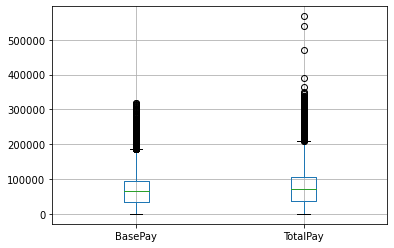

In [17]:
boxplot = salary_adjus_NaN.boxplot(["BasePay","TotalPay"])


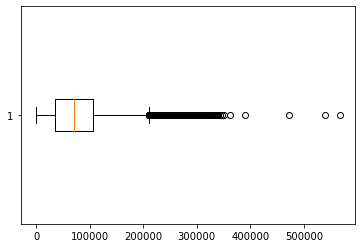

In [18]:
plt.boxplot(salary_adjus_NaN["TotalPay"], vert=False)
plt.show()


In [19]:
#Knowing the quartiles is required to detect outliers
salary_adjus_NaN.quantile([0.25,0.5,0.75])

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
0.25,37163.75,33844.7775,0.0000,0.000,22340.805000,36169.37,44072.0625,2012.0,NaN
0.50,74326.50,65092.1900,0.0000,811.205,25007.777439,71427.13,92406.0200,2013.0,NaN
0.75,111488.25,94611.0000,4657.5975,4236.035,33468.980000,105840.92,132876.9975,2014.0,NaN


In [20]:
#Delete Columns Status and Notes
salary_adjus_NaN.drop(['Notes', 'Status','Agency'], axis=1)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.777439,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.777439,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.777439,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.777439,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.777439,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...,...
148643,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.000000,0.00,0.00,2014
148644,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.000000,0.00,0.00,2014
148645,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.000000,0.00,0.00,2014
148646,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.000000,0.00,0.00,2014


In [21]:
#Filter rows and columns
salary_adjus_NaN.iloc[0:5 , [2,3,7]]

,JobTitle,BasePay,TotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,326373.19


In [22]:
#Filter rows and columns
salary_adjus_NaN.iloc[148637 : 148647 , [2,3,7]]

,JobTitle,BasePay,TotalPay
148637,Custodian,0.0,0.0
148638,Parking Control Officer,0.0,0.0
148639,Museum Guard,0.0,0.0
148640,Sign Worker,0.0,0.0
148641,Parking Control Officer,0.0,0.0
148642,"Stationary Eng, Sewage Plant",0.0,0.0
148643,Human Services Technician,0.0,0.0
148644,Communications Dispatcher 2,0.0,0.0
148645,Custodian,0.0,0.0
148646,Custodian,0.0,0.0


In [23]:
# Funtion loc
base_Pay=salary_adjus_NaN.loc[salary_adjus_NaN["TotalPay"] <=0]
base_Pay


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36155,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.00,25007.777439,0.00,0.00,2011,NaN,San Francisco,NaN
36156,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.00,25007.777439,0.00,0.00,2011,NaN,San Francisco,NaN
36157,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.00,25007.777439,0.00,0.00,2011,NaN,San Francisco,NaN
70875,70878,Roland Baylon,Deputy Court Clerk II,0.0,0.0,0.00,3728.050000,0.00,3728.05,2012,NaN,San Francisco,NaN
70925,70928,Felecia Phillips,Registered Nurse,0.0,0.0,0.00,3618.130000,0.00,3618.13,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148643,148646,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.00,0.000000,0.00,0.00,2014,NaN,San Francisco,PT
148644,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.00,0.000000,0.00,0.00,2014,NaN,San Francisco,PT
148645,148649,Leon Walker,Custodian,0.0,0.0,0.00,0.000000,0.00,0.00,2014,NaN,San Francisco,PT
148646,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.000000,0.00,0.00,2014,NaN,San Francisco,PT


In [24]:
base_Pay=salary_adjus_NaN.loc[salary_adjus_NaN["TotalPay"] < 1000]
base_Pay

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
35364,35366,YANKUI CHEN,FOOD SERVICE WORKER,999.05,0.00,0.00,25007.777439,999.05,999.05,2011,NaN,San Francisco,NaN
35365,35367,EXXON DICHOSO,FOOD SERVICE WORKER,964.60,0.00,33.06,25007.777439,997.66,997.66,2011,NaN,San Francisco,NaN
35366,35368,MARGARET ROBERTS,TESTING TECHNICIAN,878.27,117.92,0.00,25007.777439,996.19,996.19,2011,NaN,San Francisco,NaN
35367,35369,DERRICK JOE,TESTING TECHNICIAN,805.50,188.79,0.00,25007.777439,994.29,994.29,2011,NaN,San Francisco,NaN
35368,35370,MARK CARROLL,PUBLIC SERVICE AIDE-ASSOCIATE TO PROFESSIONALS,993.00,0.00,0.00,25007.777439,993.00,993.00,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148643,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.000000,0.00,0.00,2014,NaN,San Francisco,PT
148644,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.000000,0.00,0.00,2014,NaN,San Francisco,PT
148645,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.000000,0.00,0.00,2014,NaN,San Francisco,PT
148646,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.000000,0.00,0.00,2014,NaN,San Francisco,PT


In [43]:
# Categorize variables
Values = [-math.inf, 100000, 300000, math.inf]

In [44]:
categories = ["Low", "Medium", "High"]

In [27]:
salary_adjus_NaN["Income"] =pd.cut(salary_adjus_NaN["TotalPayBenefits"], bins=Values, labels=categories)
salary_adjus_NaN.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Income
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.777439,567595.43,567595.43,2011,NaN,San Francisco,NaN,High
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.777439,538909.28,538909.28,2011,NaN,San Francisco,NaN,High
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.777439,335279.91,335279.91,2011,NaN,San Francisco,NaN,Medium
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.777439,332343.61,332343.61,2011,NaN,San Francisco,NaN,Medium
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.777439,326373.19,326373.19,2011,NaN,San Francisco,NaN,Medium


In [45]:
salary_adjus_NaN.drop(['Status', 'Notes', 'Agency'], axis=1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Income
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.777439,567595.43,567595.43,2011,High
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.777439,538909.28,538909.28,2011,High
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.777439,335279.91,335279.91,2011,Medium
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.777439,332343.61,332343.61,2011,Medium
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.777439,326373.19,326373.19,2011,Medium
...,...,...,...,...,...,...,...,...,...,...,...
148643,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.000000,0.00,0.00,2014,Low
148644,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.000000,0.00,0.00,2014,Low
148645,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.000000,0.00,0.00,2014,Low
148646,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.000000,0.00,0.00,2014,Low


In [46]:
pd.unique(salary_adjus_NaN['Income'])

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [30]:
new_salarydf=salary_adjus_NaN[salary_adjus_NaN["TotalPayBenefits"]<=1000].index
new_salarydf=salary_adjus_NaN.drop(new_salarydf)

print("The new salary DataFrame is:")
print(salary_adjus_NaN,"\n")

print("The DataFrame new salary:")
print(new_salarydf)

The new salary DataFrame is:
            Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148643  148646   Carolyn A Wilson   
148644  148648     Joann Anderson   
148645  148649        Leon Walker   
148646  148650      Roy I Tillery   
148647  148654          Joe Lopez   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148643                       Human Services

In [31]:
# Use Groupby
salary_adjus_NaN.groupby(['Income'])['TotalPayBenefits'].count()

Income
Low       140502
Medium      8132
High          14
Name: TotalPayBenefits, dtype: int64

In [47]:
salary_adjus_NaN.groupby(['Income'])['TotalPay','TotalPayBenefits'].count()

C:\Users\Familia Leon\AppData\Local\Temp\ipykernel_20776\1857826202.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_adjus_NaN.groupby(['Income'])['TotalPay','TotalPayBenefits'].count()


,TotalPay,TotalPayBenefits
Income,,
Low,140502,140502
Medium,8132,8132
High,14,14


In [48]:
salary_adjus_NaN.groupby(['Income'])['TotalPayBenefits'].mean()

Income
Low        85621.970175
Medium    232567.179781
High      446196.764286
Name: TotalPayBenefits, dtype: float64

In [49]:
salary_adjus_NaN.groupby(['Income'])['TotalPayBenefits'].agg(['mean','sum'])

,mean,sum
Income,,
Low,85621.970175,1.203006e+10
Medium,232567.179781,1.891236e+09
High,446196.764286,6.246755e+06


In [50]:
salary_adjus_NaN['TotalPay'].describe()

count    148648.000000
mean      74770.035453
std       50516.440633
min        -618.130000
25%       36169.370000
50%       71427.130000
75%      105840.920000
max      567595.430000
Name: TotalPay, dtype: float64

## Histrogram

(array([3.7738e+04, 4.1937e+04, 3.6741e+04, 2.0529e+04, 8.5890e+03,
        2.4400e+03, 4.9200e+02, 1.2400e+02, 5.0000e+01, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  -618.13 ,  37262.774,  75143.678, 113024.582, 150905.486,
        188786.39 , 226667.294, 264548.198, 302429.102, 340310.006,
        378190.91 , 416071.814, 453952.718, 491833.622, 529714.526,
        567595.43 ]),
 <BarContainer object of 15 artists>)

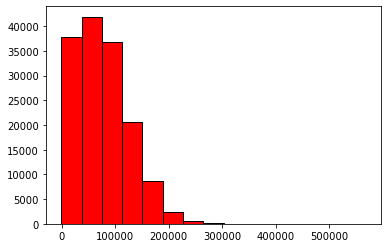

In [51]:
plt.hist(salary_adjus_NaN['TotalPay'], 15, color="red", ec="black")

(array([2.9545e+04, 1.2814e+04, 2.8851e+04, 3.0784e+04, 1.9686e+04,
        1.5785e+04, 6.5870e+03, 2.3200e+03, 1.4610e+03, 5.7000e+02,
        1.3400e+02, 4.6000e+01, 3.8000e+01, 1.5000e+01, 1.2000e+01]),
 array([-1.66010000e+02,  2.11300580e+04,  4.24261260e+04,  6.37221940e+04,
         8.50182620e+04,  1.06314330e+05,  1.27610398e+05,  1.48906466e+05,
         1.70202534e+05,  1.91498602e+05,  2.12794670e+05,  2.34090738e+05,
         2.55386806e+05,  2.76682874e+05,  2.97978942e+05,  3.19275010e+05]),
 <BarContainer object of 15 artists>)

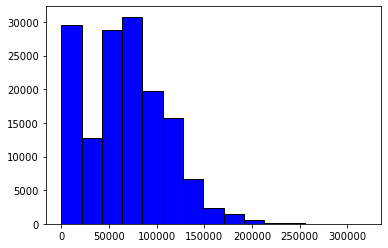

In [39]:
plt.hist(salary_adjus_NaN['BasePay'], 15, color="blue", ec="black")

C:\Users\Familia Leon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

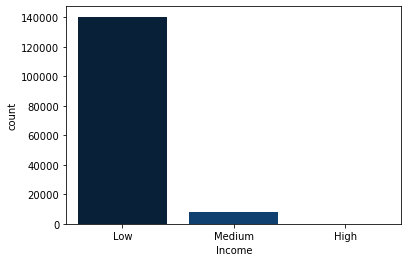

In [54]:
sns.countplot(salary_adjus_NaN['Income'], palette= 'ocean')